In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [77]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [78]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results.csv False 300


In [79]:
%%time
os.environ["TOKENIZERS_PARALLELISM"] = "true"

!python --version
!pip show torch transformers

Python 3.11.9
Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, torchaudio, torchvision
---
Name: transformers
Version: 4.43.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenize

In [80]:
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

device = check_gpu()

MPS is available


In [81]:
import pandas as pd

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 81 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   01-ai/Yi-1.5-9B-Chat/rpp-1.00                       1133 non-null   object
 3   01-ai/Yi-1.5-9B-Chat/rpp-1.02                       1133 non-null   object
 4   01-ai/Yi-1.5-9B-Chat/rpp-1.04                       1133 non-null   object
 5   01-ai/Yi-1.5-9B-Chat/rpp-1.06                       1133 non-null   object
 6   01-ai/Yi-1.5-9B-Chat/rpp-1.08                       1133 non-null   object
 7   01-ai/Yi-1.5-9B-Chat/rpp-1.10                       1133 non-null   object
 8   01-ai/Yi-1.5-9B-Chat/rpp-1.12                       1133 non-null   object
 9   01-ai/Yi

In [82]:
columns = df.columns[2:].to_list()
columns.sort()
columns = df.columns[:2].to_list() + columns
columns

['chinese',
 'english',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.00',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.02',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.04',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.06',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.08',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.10',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.12',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.14',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.16',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.18',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.20',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.22',
 'Qwen/Qwen2-72B-Instruct/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/rpp-1.10',
 'Qwen/Qwen2-72B-Instruct/rpp-1.12',
 'Qwen/Qwen2-72B-Instruct/rpp-1.14',
 'Qwen/Qwen2-72B-Instruct/rpp-1.16',
 'Qwen/Qwen2-72B-Instruct/rpp-1.18',
 'Qwen/Qwen2-72B-Instruct/rpp-1.20',
 'Qwen/Qwen2-72B-Instruct/rpp-1.22',
 'Qwen/Qwen2-72B-Instruct/rpp-1.24',
 'Qwen/Qwen2-72B-Instruct/rpp-1.26',
 'Qwen/Qwen2-72B-Instruct/rpp-1.28',
 'Qwen/Qwen2-

In [83]:
df = df[columns]
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens)
metrics_df

01-ai/Yi-1.5-9B-Chat/rpp-1.00: {'meteor': 0.3463725436435439, 'bleu_scores': {'bleu': 0.09312113035602035, 'precisions': [0.37803102247546694, 0.1276225498243425, 0.05633754814082683, 0.027665603967410555], 'brevity_penalty': 1.0, 'length_ratio': 1.0463729711825107, 'translation_length': 31590, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3870139699578016, 'rouge2': 0.1488247506004683, 'rougeL': 0.33287597095291194, 'rougeLsum': 0.33363484077183997}, 'accuracy': 0.0, 'correct_ids': []}
01-ai/Yi-1.5-9B-Chat/rpp-1.02: {'meteor': 0.3471185374158656, 'bleu_scores': {'bleu': 0.09126513887574451, 'precisions': [0.37119079293382423, 0.12507213850593138, 0.055267358339984037, 0.027039160162994683], 'brevity_penalty': 1.0, 'length_ratio': 1.0706525339516395, 'translation_length': 32323, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.387830080294432, 'rouge2': 0.14937986353938124, 'rougeL': 0.3325894211716421, 'rougeLsum': 0.33382464511623333}, 'accuracy': 0.0, 'correct_ids

model   rpp    meteor    bleu_1  \
0                        01-ai/Yi-1.5-9B-Chat  1.00  0.346373  0.093121   
1                        01-ai/Yi-1.5-9B-Chat  1.02  0.347119  0.091265   
2                        01-ai/Yi-1.5-9B-Chat  1.04  0.347188  0.090199   
3                        01-ai/Yi-1.5-9B-Chat  1.06  0.347595  0.090050   
4                        01-ai/Yi-1.5-9B-Chat  1.08  0.347511  0.090048   
..                                        ...   ...       ...       ...   
74  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.22  0.319397  0.080273   
75  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.24  0.318866  0.078780   
76  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.26  0.318051  0.077776   
77  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.28  0.315641  0.074712   
78  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.30  0.314485  0.074847   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.332876        0.0          0.351280           0.351280  0.341256   
1   0.332589        0.0          0.264784           0.264784  0.343223   
2   0.331946        0.0          0.377758           0.377758  0.341686   
3   0.331282        0.0          0.468667           0.468667  0.340815   
4   0.331427        0.0          0.311562           0.311562  0.342942   
..       ...        ...               ...                ...       ...   
74  0.308984        0.0          0.100618           0.100618  0.318015   
75  0.307286        0.0          0.082083           0.082083  0.317738   
76  0.306677        0.0          0.073257           0.073257  0.317046   
77  0.304695        0.0          0.057370           0.057370  0.314859   
78  0.303526        0.0          0.067961           0.067961  0.313562   

    num_max_output_tokens  
0                       2  
1                       4  
2                       8  
3                       9  
4                       4  
..                    ...  
74                      0  
75                      0  
76                      0  
77                      0  
78                      0  

[79 rows x 10 columns]

In [84]:
models = metrics_df["model"].unique()
models

array(['01-ai/Yi-1.5-9B-Chat', 'Qwen/Qwen2-72B-Instruct',
       'Qwen/Qwen2-7B-Instruct', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [85]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

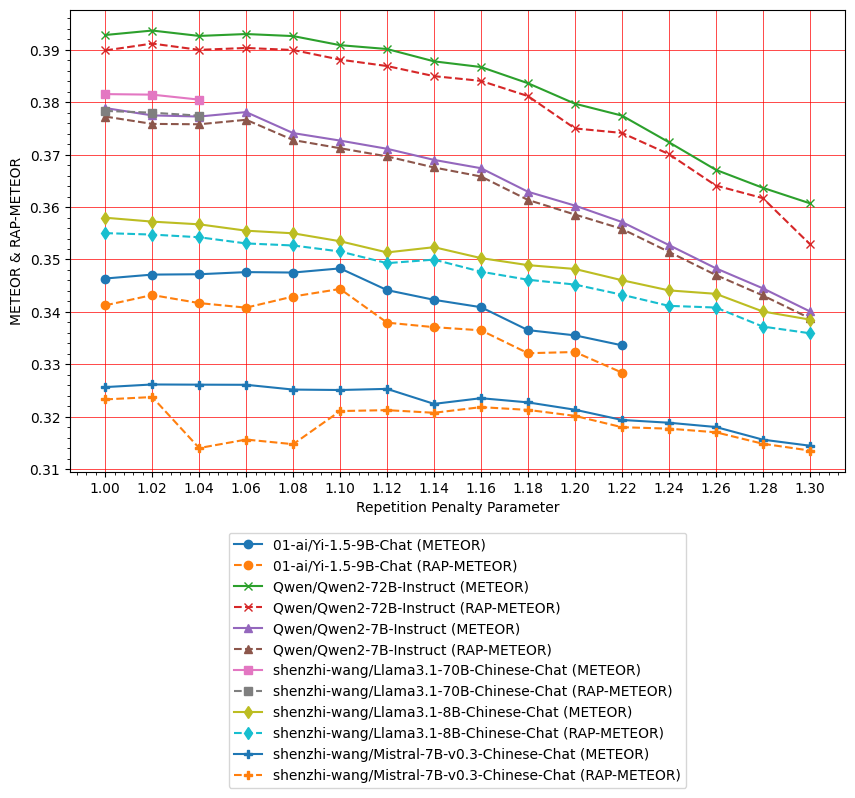

In [86]:
# plot meteor vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["meteor"],
        label=model + " (METEOR)",
        marker=markers[model],
    )
    ax.plot(
        model_df["rpp"],
        model_df["rap"],
        label=model + " (RAP-METEOR)",
        linestyle="--",
        marker=markers[model],
    )

ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("METEOR & RAP-METEOR")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.7))
plt.show()

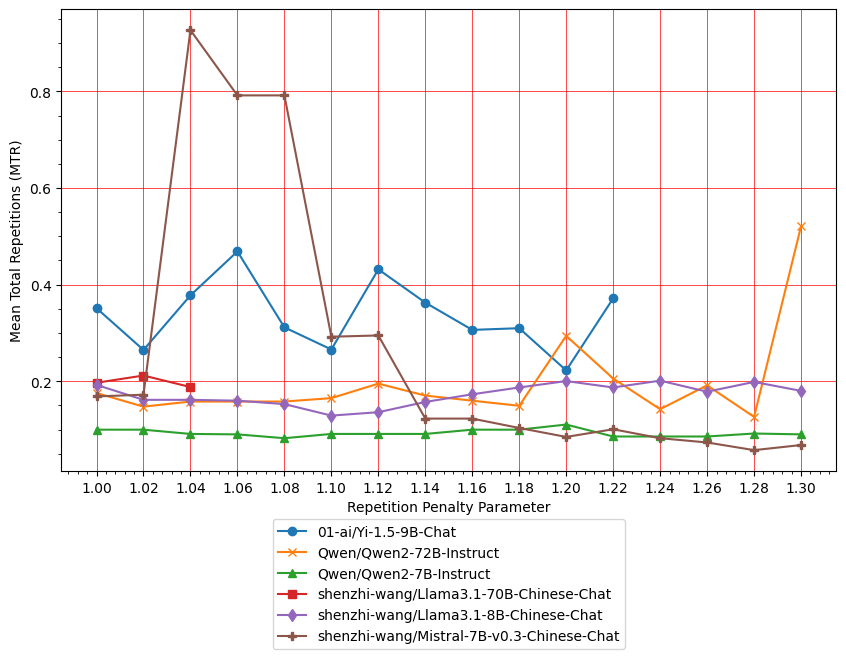

In [87]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(
    which="major", linestyle="-", linewidth="0.5", color="red"
)
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["total_repetitions"],
        label=model,
        marker=markers[model],
    )

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Mean Total Repetitions (MTR)")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
plt.show()

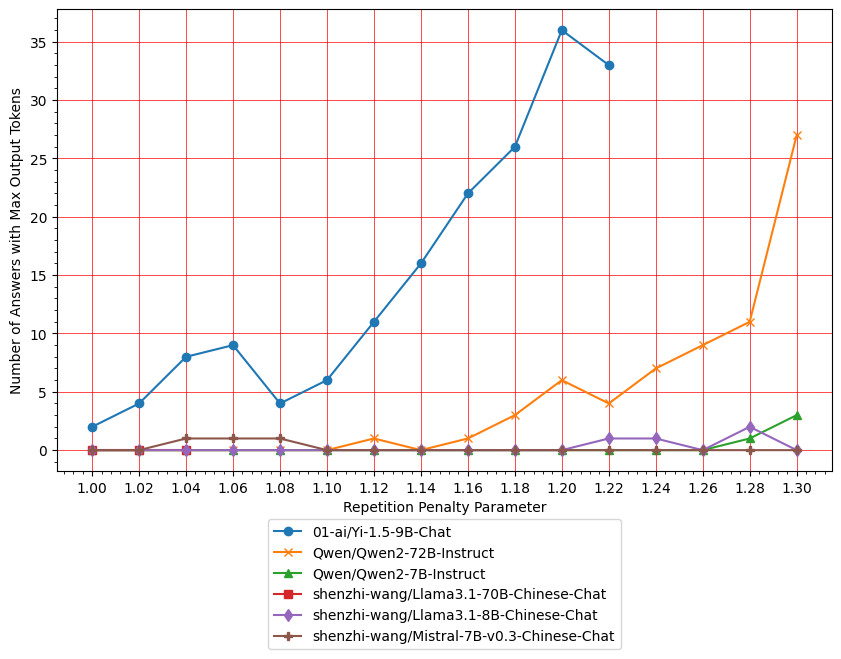

In [88]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["num_max_output_tokens"], label=model, marker=markers[model])

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Number of Answers with Max Output Tokens")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
plt.show()

In [89]:
def detect_repetitions_for_model_outputs(df, col, threshold=100):
    df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
        detect_scores
    )
    return df.query(f"total_repetitions > {threshold}")

In [90]:
col = "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.04"
rows = detect_repetitions_for_model_outputs(df, col)
rows

chinese                                    english  \
193  “有…… 没有…… 有…… 没有……     'Yes . . . no . . . yes . . . no . . .   
759           我是个什么东西儿!  What sort of creature do you take me for?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.00 01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I!      What kind of thing am I!   

    01-ai/Yi-1.5-9B-Chat/rpp-1.04 01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.08 01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… no…"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.12 01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… No…"  ...   
759      What kind of thing am I?      What kind of thing am I?  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                142                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                  9                 
759                                                 15                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
193                                                  9                 
759                                                 36                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
193                                                  9                
759                                                 36                

[2 rows x 172 columns]

In [91]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
Yes, I can help you with that! Here's the translation:

"Yes, I can help you with that! Here's the translation:

有 - Yes
没有 - No

So, the translated content is:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translatio

(0, 784, 784)

In [92]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

我是个什么东西儿!
What sort of creature do you take me for?
I am a Chinese-English translator. Here is the translation of the text:

"I am a Chinese-English translator. Here is the translation of the text:

"What am I?"

The answer is: "I am a Chinese-English translator."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(0, 148), match='I am a Chinese-English translator. Here is the tr>
Group 1 found at 0-74: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 2 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 3 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
(0, 148, 148)


(0, 148, 148)

In [93]:
col = "Qwen/Qwen2-72B-Instruct/rpp-1.26"
rows = detect_repetitions_for_model_outputs(df, col, threshold=50)
rows

chinese  \
193                                 “有…… 没有…… 有…… 没有……   
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   

                                               english  \
193             'Yes . . . no . . . yes . . . no . . .   
327  short-long-long-long-long, short-long-long-lon...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words and numbers: "长长长长...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193                            "Yes…… no…… yes…… no……"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
193                                "Yes… no… Yes… no…"   
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193                                "Yes… no… Yes… No…"  ...   
327  This is a sequence of words: "short long long ...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                142                 
327                                                 83                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                  9                 
327                                                 61                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                  9                 
327                                                 81                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                  9                 
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
193                                                  9                 
327                                                 65                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
193                                                  9                 
327                                                 64                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
193                                                  9                 
327                                                120                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
193                                                  9                
327                                                202                

[2 rows x 172 columns]

In [94]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
"There is... There isn't... There is... There isn't..."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(1, 54), match="There is... There isn't... There is... There isn'>
Group 1 found at 1-27: `There is... There isn't...`
Group 2 found at 28-54: `There is... There isn't...`
Group 3 found at 28-54: `There is... There isn't...`
(0, 53, 53)


(0, 53, 53)

In [95]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
Short long long long longer, short long long long longer, short short short shorter, long long longer shorter, long long short longer longer, short short longer longer, short short short longer, long long short longer longer, short short short longer, long long short shorter - this is 11:08:21:37. 

(Note: The structure of the sentence seems poetic or code-like; it may not have a direct meaningful translation.)
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(1, 59), match='hort long long long longer, short long long long >
Group 1 found at 1-30: `hort

(0, 224, 224)

In [96]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
df2

chinese  \
28                                     你说么，这几年不见，我就忘了。   
41                                          “目标距琴两公里！”   
130  我这份交待材料不少人要看，假如他们看了情不自禁，也去搞破鞋，那倒不伤大雅，要是学会了这个，那...   
133                                         “目标距琴一公里！”   
253                       我和陈清扬在蓝粘土上，闭上眼睛，好像两只海豚在海里游动。   
475                       吕留良提笔沉吟半晌，便在画上振笔直书。 顷刻诗成，诗云：   
546                             这想象力是龙门能跳狗洞能钻的，一无清规戒律。   
757  士隐见女儿越发生得粉装玉琢，乖觉可喜，便伸手接来抱在怀中斗他玩耍一回， 又带至街前，看那过会...   
836  夜色灰葡萄，金风串河道，宝蓝色的天空深邃无边，绿色的星辰格外明亮。 北斗勺子星——北斗主死，...   

                                               english  \
28   It's so many years since I saw you last, I'd f...   
41         'Target is two kilometers from the zither.'   
130  Many people would read my confessions. If afte...   
133         'Target is one kilometer from the zither.'   
253  When Chen Qingyang and I lay on the blue clay ...   
475  He picked up a writing-brush and for some minu...   
546  With the imagination completely free from all ...   
757  Her delicate little pink-and-white face seemed...   
836  On that grey-purple night a golden breeze foll...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.26  \
28   You tell me, these few years we haven't seen e...   
41   "The target is two kilometers away from the pi...   
130  Many people will be reading my statement; if t...   
133  "The target is one kilometer away from the pia...   
253  Wu Hu and Chen Qingyang on the blue clay, eyes...   
475  Lu Liuliang picked up his brush and pondered f...   
546  This imagination knows no bounds or restrictio...   
757  Shi Yin saw that his daughter was growing more...   
836  The night sky is dove gray; golden breezes thr...   

     output_tokens-Qwen/Qwen2-72B-Instruct/rpp-1.26  
28                                              300  
41                                              300  
130                                             300  
133                                             300  
253                                             300  
475                                             300  
546                                             300  
757                                             300  
836                                             300

In [97]:
print_row_details(df2, range(len(df2)))

--------------------------------------------------
chinese: 你说么，这几年不见，我就忘了。
--------------------------------------------------
english: It's so many years since I saw you last, I'd forgotten all about you!
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/rpp-1.26: You tell me, these few years we haven't seen each other, I've forgotten. 

(Note: The translation might sound a bit awkward because it's trying to be as literal as possible with respect to grammar structure of original sentence) A more natural way would probably be "Tell you what, after all those years without seeing each other,  I forgot." or simply "I guess It has been so long since we last met that i have forgotten" . However ,the former is closer meaning wise while latter provides better grammatical accuracy compared against source language syntax rules applied here within this specific context given by user for conversion from one linguistic system (Chinese )to another(English). Therefore both i

In [98]:
col = "01-ai/Yi-1.5-9B-Chat/rpp-1.20"
rows = detect_repetitions_for_model_outputs(df, col, threshold=30)
rows

chinese  \
248                     我成了替爷们解闷儿的了。”   
544  那里的人习惯于把一切不是破鞋的人说成破鞋，而对真的破鞋放任自流。   
816                   韦小宝接过匕首，说道：“好！”   

                                               english  \
248  I am to become a source of entertainment for t...   
544  People there were used to accusing the innocen...   
816                            'Right, ' said Trinket.   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\n\nThe translation is: "韦小宝 to...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\n\nThe translation is: "韦小宝 to...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\nTranslation:\n\n韦小宝 took the ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\nTranslation:\nWei Xiaobao too...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\nTranslation:\nWei Xiaobao too...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\nTranslation:\nWei Xiaobao too...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
248  I became the one who provides amusement for my...   
544  The people there are used to calling anyone wh...   
816  韦小宝接过匕首，说道：“好！”\nTranslation: "Wei Xiaobao too...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
248  I became the one who provides amusement for my...  ...   
544  The people there are used to calling anyone wh...  ...   
816  韦小宝接过匕首，说道：“好！”\nTranslation: "Wei Xiaobao too...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
248                                                 17                 
544                                                 36                 
816                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
248                                                 17                 
544                                                 36                 
816                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
248                                                 17                 
544                                                 33                 
816                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
248                                                 17                 
544                                                 33                 
816                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
248                                                 17                 
544                                                 33                 
816                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
248                                                 17                 
544                                                 33                 
816                                                 17                 

    output_tok

In [99]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

我成了替爷们解闷儿的了。”
I am to become a source of entertainment for the menfolk now, it seems.'
I became the one who provides amusement for my master." 0.9634518277169037 0.9634518277169037 I apologize if there's any confusion. Here is a more detailed translation: "I have become the person who entertains my master to alleviate his boredom." 0.9634518277169037 The given Chinese sentence translates to: "I became the one who provides amusement for my master." This can also be interpreted as: "I am now responsible for entertaining my master to keep him from getting bored." 0.9634518277169037 My apologies for the repetition. Let me clarify further with this explanation: In simple terms, it means that someone has taken on the role of making their 'master' (could imply a relationship like employer or mentor) feel less lonely or bored by providing entertainment or company. So, the direct translation could be something along these lines: "Now I am the one who relieves my lord's ennui [boredom]." 0.96345

(0, 39, 39)

In [100]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

那里的人习惯于把一切不是破鞋的人说成破鞋，而对真的破鞋放任自流。
People there were used to accusing the innocent of being damaged goods, but as for real damaged goods, they just let them do whatever they wanted.
The people there are used to calling anyone who is not a slandered person a slandered person, while letting those truly being slandered go their own way.
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(54, 92), match=' a slandered person a slandered person'>
Group 1 found at 54-73: ` a slandered person`
Group 2 found at 73-92: ` a slandered person`
Group 3 found at 73-92: ` a slandered person`
(0, 38, 38)


(0, 38, 38)

In [101]:
row = rows.iloc[2]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

韦小宝接过匕首，说道：“好！”
'Right, ' said Trinket.
Ve Xiao-Bao took the dagger and said, "Good!" Ve Xiao-Bao took the dagger and said, "Good!"
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(0, 91), match='Ve Xiao-Bao took the dagger and said, "Good!" Ve >
Group 1 found at 0-45: `Ve Xiao-Bao took the dagger and said, "Good!"`
Group 2 found at 46-91: `Ve Xiao-Bao took the dagger and said, "Good!"`
Group 3 found at 46-91: `Ve Xiao-Bao took the dagger and said, "Good!"`
(0, 91, 91)


(0, 91, 91)

In [102]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
df2

chinese  \
8                                  “老克腊”是这粗糙时尚中的一点精细所在。   
30                                             “就是上大学呀！   
41                                           “目标距琴两公里！”   
60                                然后很多人拥了上来，把我们拥在中间要打架。   
80                                            ——可别冒撞了！”   
117                            刘姥姥心中想着：“这是什么东西? 有煞用处呢？”   
120                               说起爱因斯坦，你比我有更多的东西需要交待。   
133                                          “目标距琴一公里！”   
138                                     年纪大了，陈清扬变得有点敏感。   
157           其实在一般女学生看来，能为导演看上去试一回，已是足够的光荣，成功则是奢望中的奢望。   
166                              刘姥姥道：“阿弥陀佛! 这全仗嫂子方便了。”   
167                              钱老板道：“正是。 沐王府小公爷的嫡亲妹子。   
260   那刘姥姥先听见告艰苦，只当是没想头了， 又听见给他二十两银子，喜的眉开眼笑道：“我们也知道艰...   
272                                       你…… 你可摔痛了没有？”   
308                            一般总是严家师母说，王琦瑶听，说的和听的都入神。   
317                                          我可那里敢挑他呢？”   
366         你只顾一时为我得罪了人，他们都记在心里，遇着坎儿，说的好说不好听的，大家什么意思呢？”   
385   韦小宝想问他什么叫神堂穴、环跳穴，如何点穴、解穴，但转念一想，自己是青木堂香主，又是总舵主的...   
413                                             “知道的不多。   
416                                      “后来我们走向广阔天地了！”   
614                              在我看来，这东西无比重要，就如我之存在本身。   
621      顾炎武道：“晚村兄豪气干云，令人好生敬佩。 怕的是见不到鞑子皇帝，却死于一般的下贱奴才手里。   
651                                  “我想观测宇宙背景辐射的整体波动。”   
667                       但这些细节终不那么真实，浮在面上的，它们刺痛了老克腊的心。   
671                                 “我看没必要在这个警察身上浪费时间。”   
683                                         刘姥姥道：“我也知道。   
685                                            我确实去过境外。   
729                                            我师意为如何？”   
731                                  我整天一声不吭。 陈清扬也一声不吭。   
757   士隐见女儿越发生得粉装玉琢，乖觉可喜，便伸手接来抱在怀中斗他玩耍一回， 又带至街前，看那过会...   
759                                           我是个什么东西儿!   
793                                               “下轿！”   
910                              然而，这城市里的真心，却唯有到流言里去找的。   
969                               现在它是一片废墟了，人创造的，又被人摧毁。   
1086                                          “会伤及无辜吗？”   
1118                                    “你给我下来，我操死你活妈！”   

                                                english  \
8     In this crude and uncultured fashion world, th...   
30                 'The National College Entrance Exam!   
41          'Target is two kilometers from the zither.'   
60    Then people began to gather, forming a tight r...   
80                But mind you don't run into anybody.'   
117   'I wonder what that can be,' she thought to he...   
120   But you actually have more to confess about Ei...   
133          'Target is one kilometer from the zither.'   
138   An older woman now, Chen Qingyang had become m...   
157   Actually, just to be chosen by a director for ...   
166   'Bless you, my dear, for being such a help!' s...   
167   'Young Lord Mu's little sister,' said Butcher ...   
260   When Grannie Liu heard Xi-feng talk about 'dif...   
272                             Did you hurt yourself?'   
308   Madame Yan did most of the talking while Wang ...   
317        I should never dare to find fault with her.'   
366   You don't seem to realize. You offend people o...   
385   Trinket wanted to ask him where the Holy Hall ...   
413                                 'I don't know much.   
416             'Then, we were sent to the wilderness!'   
614   To me, the thing was extremely important, as i...   
621   'I admire your heroic spirit,' said Gu, 'but I...   
651   'I want to see the overall fluctuation in the ...   
667   But none of those details looked real; they fl...   
671   'I don't think we need to waste time on this p...   
683          'I knew all about that,' said Grannie Liu.   
685                             I did cross the border.   
729              What does your reverence say to that?'   
731   I stayed mute all day long, and so did Chen Qi...   
757   Her delicate little pink-and-white face seemed...   
759           What sort of creature

In [103]:
print_row_details(df2, range(len(df2)))

--------------------------------------------------
chinese: “老克腊”是这粗糙时尚中的一点精细所在。
--------------------------------------------------
english: In this crude and uncultured fashion world, the 'Old Colours' were the stewards in charge of safekeeping refinement.
--------------------------------------------------
01-ai/Yi-1.5-9B-Chat/rpp-1.20: "Old Klaatu" is a touch of refinement within this rough fashion. 

I have provided the translation as requested, without any additional context or formatting. The original Chinese sentence has been accurately translated into English according to its meaning. Here's the step-by-step process I followed for the translation:

1. Identify key phrases/words in the source language (Chinese): "老克腊", "粗糙时尚", "一点精细所在".
2. Translate each phrase individually while maintaining their contextual relevance: "Old Klaatu", "rough fashion", "a touch of refinement".
3. Combine these translations coherently in target language (English) respecting grammar rules: "Old Klaatu

In [104]:
df.describe()

ground_truth_ews_score  ground_truth_repetition_score  \
count                  1133.0                    1133.000000   
mean                      0.0                       0.312445   
std                       0.0                       7.193649   
min                       0.0                       0.000000   
25%                       0.0                       0.000000   
50%                       0.0                       0.000000   
75%                       0.0                       0.000000   
max                       0.0                     239.000000   

       ground_truth_total_repetitions  ews_score  repetition_score  \
count                     1133.000000     1133.0       1133.000000   
mean                         0.312445        0.0          0.231244   
std                          7.193649        0.0          3.339904   
min                          0.000000        0.0          0.000000   
25%                          0.000000        0.0          0.000000   
50%                          0.000000        0.0          0.000000   
75%                          0.000000        0.0          0.000000   
max                        239.000000        0.0         91.000000   

       total_repetitions  ground_truth_tokens-01-ai/Yi-1.5-9B-Chat  \
count        1133.000000                               1133.000000   
mean            0.231244                                 33.044131   
std             3.339904                                 22.889653   
min             0.000000                                  1.000000   
25%             0.000000                                 17.000000   
50%             0.000000                                 28.000000   
75%             0.000000                                 42.000000   
max            91.000000                                154.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
count                                  1133.000000   
mean                                     35.954104   
std                                      31.319419   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     320.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
count                                  1133.000000   
mean                                     36.389232   
std                                      33.350099   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     332.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.04  ...  \
count                                  1133.000000  ...   
mean                                     37.240953  ...   
std                                      36.431663  ...   
min                                       1.000000  ...   
25%                                      18.000000  ...   
50%                                      28.000000  ...   
75%                                      44.000000  ...   
max                                     326.000000  ...   

       output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
count                                        1133.000000                  
mean                                           32.159753                  
std                                            22.421439                  
min                                             3.000000                  
25%                                            17.000000                  
50%                                            27.000000                  
75%                                            41.000000                  
max                                           212.000000      

In [105]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)